## Classificador de imagens de dia e noite


Utilizando o conjunto de imagens do dataset do projeto [AMOS](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes), construir um classificador de imagens que dado uma determinada imagem deverá ser capaz em classificar em _dia_ ou _noite_.

Para este modelo, será levado em consideração como principal característica seu respectivo valor de brilho.

Exemplos de imagens disponíveis na pasta _imagens_.

_Dia_
![alt text](imagens/test/day/20151101_152050.jpg)

_Noite_
![alt text](imagens/test/night/20151101_072507.jpg)

**Principais atividades do _pipeline_**

1. Normalizar
2. Extrair características
3. Construir classificador
4. Testar o modelo

*Adaptado deste [repositório](https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation) de Visão Computacional da Udacity, de Cezanne Camacho.*

In [17]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def carregar_arquivos(image_dir):
    
    im_list = []
    image_types = ["day", "night"]
    
    for im_type in image_types:
        
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            im = cv2.imread(file)
            
            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

In [20]:
lista_imagens_teste = carregar_arquivos("imagens/test")
lista_imagens_treinamento = carregar_arquivos("imagens/training")

**Normalização**

Constuir uma função que receberá uma imagem e redimensionará para o tamanho 1000 x 600

Text(0.5,1,'night')

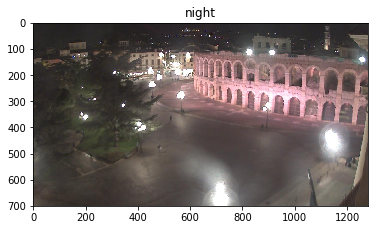

In [43]:
plt.imshow(lista_imagens_treinamento[200][0])
plt.title(lista_imagens_treinamento[200][1])

Text(0.5,1,'day')

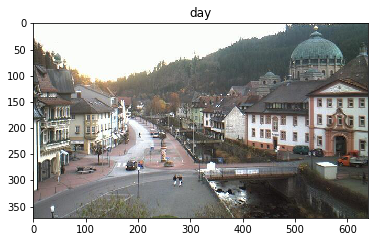

In [75]:
plt.imshow(lista_imagens_treinamento[0][0])
plt.title(lista_imagens_treinamento[0][1])

In [226]:
def padronizar_imagem(imagem):
    imagem_padrao = cv2.resize(imagem, (1000, 600), interpolation = cv2.INTER_LANCZOS4)
    
    return imagem_padrao

**Extração de características**

Para cada imagem analisada, extrair o componente de brilho médio associado.

In [227]:
def extrair_brilho_medio(imagem):
    hsv = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)
    
    soma_brilho = np.sum(hsv[:,:,2])
    area = imagem.shape[0]*imagem.shape[1]
    
    media_brilho = soma_brilho/area
    
    return media_brilho

In [228]:
def extrair_caracteristica_imagem(lista_imagem):
    
    lista_imagem_padrao = []
    
    for imagem_dados in lista_imagem:
        imagem = imagem_dados[0]
        label = imagem_dados[1]
        
        imagem_redimensionada = padronizar_imagem(imagem)
        
        brilho_medio = extrair_brilho_medio(imagem_redimensionada)
        
        if label == "day":
            label_encoded = 1
        else:
            label_encoded = 0
        
        lista_imagem_padrao.append((brilho_medio, label_encoded))
    
    return lista_imagem_padrao

Text(0.5,1,'day')

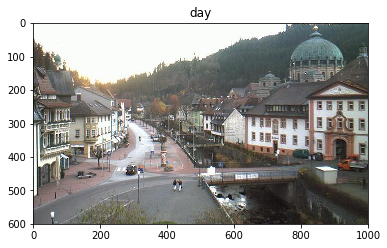

In [229]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]))
plt.title(lista_imagens_treinamento[0][1])

Text(0.5,1,'0')

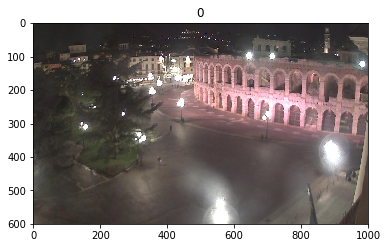

In [230]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[200][0]))
plt.title(lista_padronizada_treinamento[200][1])

In [231]:
lista_padronizada_treinamento = extrair_caracteristica_imagem(lista_imagens_treinamento)
lista_padronizada_teste = extrair_caracteristica_imagem(lista_imagens_teste)

In [233]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

classificador_decision_tree = DecisionTreeClassifier(random_state=0)

In [234]:
def definicao_feature_class(lista_padronizada):
    X = []
    Y = []

    for item in lista_padronizada:
        X.append(item[0])
        Y.append(item[1])

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    return X, Y

In [235]:
X, Y = definicao_feature_class(lista_padronizada_treinamento)

In [236]:
classificador_decision_tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Text(0.5,1,'day')

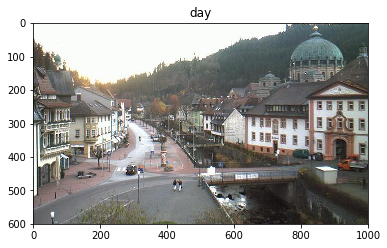

In [237]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[0][0]))
plt.title(lista_imagens_treinamento[0][1])

**Construção do classificador**

Desenvolver um modelo de aprendizado de máquina que seja capaz de classificar adequadamente, com no mínimo 90% de acurácia, as imagens que representam o dia e a noite.

In [238]:
classificador_decision_tree.predict(lista_padronizada_treinamento[0][0])

array([1])

Text(0.5,1,'night')

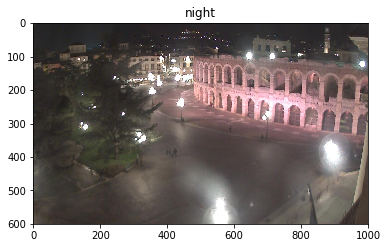

In [239]:
plt.imshow(padronizar_imagem(lista_imagens_treinamento[150][0]))
plt.title(lista_imagens_treinamento[150][1])

In [240]:
classificador_decision_tree.predict(lista_padronizada_treinamento[150][0])

array([0])

**Teste do modelo**

Dado o conjunto de testes, verificar a acurácia do modelo.

In [241]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_test, Y_test = definicao_feature_class(lista_padronizada_teste)
Y_pred = classificador_decision_tree.predict(X_test)

In [242]:
accuracy_score(Y_test,Y_pred)*100

91.875

In [243]:
confusion_matrix(Y_test, Y_pred)

array([[72,  8],
       [ 5, 75]])

Text(0.5,1,'night')

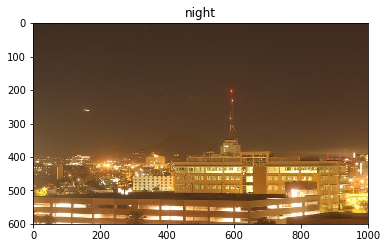

In [244]:
plt.imshow(padronizar_imagem(lista_imagens_teste[99][0]))
plt.title(lista_imagens_teste[99][1])

In [245]:
classificador_decision_tree.predict(lista_padronizada_teste[99][0])

array([1])